# Breast Cancer Classification

## Project Overview

This project involves building a classification model to predict whether a breast cancer tumor is benign or malignant based on features extracted from a digitized image of a fine needle aspirate (FNA) of a breast mass. The dataset contains real-valued features that describe characteristics of the cell nuclei present in the image. The classification task involves predicting the diagnosis (benign or malignant) using these features.

The dataset used in this project is the **Breast Cancer Wisconsin (Diagnostic) Dataset**, which is publicly available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The project involves data preprocessing, feature analysis, and building a machine learning model to accurately classify the tumors.

## Data Source

This dataset is freely available in Kaggele in the following link:
> [https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data]

## Dataset Description

The dataset contains the following attributes:

1. **ID number**: Unique identifier for each sample.
2. **Diagnosis**: Target variable (M = malignant, B = benign).
3. **Features**: There are 30 real-valued features computed for each cell nucleus in the image. These features include:
   - **Radius** (mean of distances from center to points on the perimeter)
   - **Texture** (standard deviation of gray-scale values)
   - **Perimeter**
   - **Area**
   - **Smoothness** (local variation in radius lengths)
   - **Compactness** (perimeter² / area - 1.0)
   - **Concavity** (severity of concave portions of the contour)
   - **Concave points** (number of concave portions of the contour)
   - **Symmetry**
   - **Fractal dimension** ("coastline approximation" - 1)
   
   The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in a total of 30 features. For instance:
   - Field 3 is Mean Radius.
   - Field 13 is Radius Standard Error (SE).
   - Field 23 is Worst Radius.

- **Number of Instances**: 569
- **Number of Attributes**: 32 (ID number, diagnosis, and 30 real-valued features)
- **Missing Values**: None
- **Class Distribution**: 357 benign, 212 malignant

## Attribute Information

1. **ID number**
2. **Diagnosis**: (M = malignant, B = benign)
3. **Ten real-valued features** are computed for each cell nucleus:
   - **Radius** (mean of distances from center to points on the perimeter)
   - **Texture** (standard deviation of gray-scale values)
   - **Perimeter**: Perimeter of the tumor.
   - **Area**: Area of the tumor.
   - **Smoothness** (local variation in radius lengths)
   - **Compactness** (perimeter² / area - 1.0)
   - **Concavity** (severity of concave portions of the contour)
   - **Concave points** (number of concave portions of the contour)
   - **Symmetry**
   - **Fractal dimension** ("coastline approximation" - 1)


## Problem Statement

- **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the data, find the patterns present in the data and find the most significant attributes to classify a tumor wheather it is malignant or benign.
- **Date Cleaning**: Clean the data to remove unnecessary features, impute or remove the missing values and outliers, encode the categorical features.


### Load Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import LabelEncoder

### Settings

In [3]:
# Warnings
warnings.filterwarnings("ignore")
# Plot
sns.set_style("darkgrid")
# Path
data_path = "../data"
csv_path = os.path.join(data_path,"data.csv")

### Load Data

In [4]:
df = pd.read_csv(csv_path)

In [5]:
# Show 1st 5 rows to get an idea about the data present in each feature
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Data Analysis

In [6]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of Observations: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

DATA DESCRIPTION
Number of Observations: 569
Number of Features: 33


In [8]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
unique_features = [col for col in df.columns if df[col].nunique() == df.shape[0]]
print(f"Number of features containing unique values: {len(unique_features)}")
print(unique_features)

FEATURE DESCRIPTION
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64


### Key Findings

- All the features except the target variable(diagnosis) are **numerical** features.
- The id feature contains unique values for each observations, so, this feature doesn't help to find any pattern in the data. This feayre should the removed.

In [9]:
# Missing value detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present in any feature of the dataset.")

MISSING VALUE DETECTION
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimensi

### Key Findings

- Only **Unnamed: 32** feature contains null **100%** null values. So, this feature needs to be removed.

In [10]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


### Outlier Detection in Numerical Features

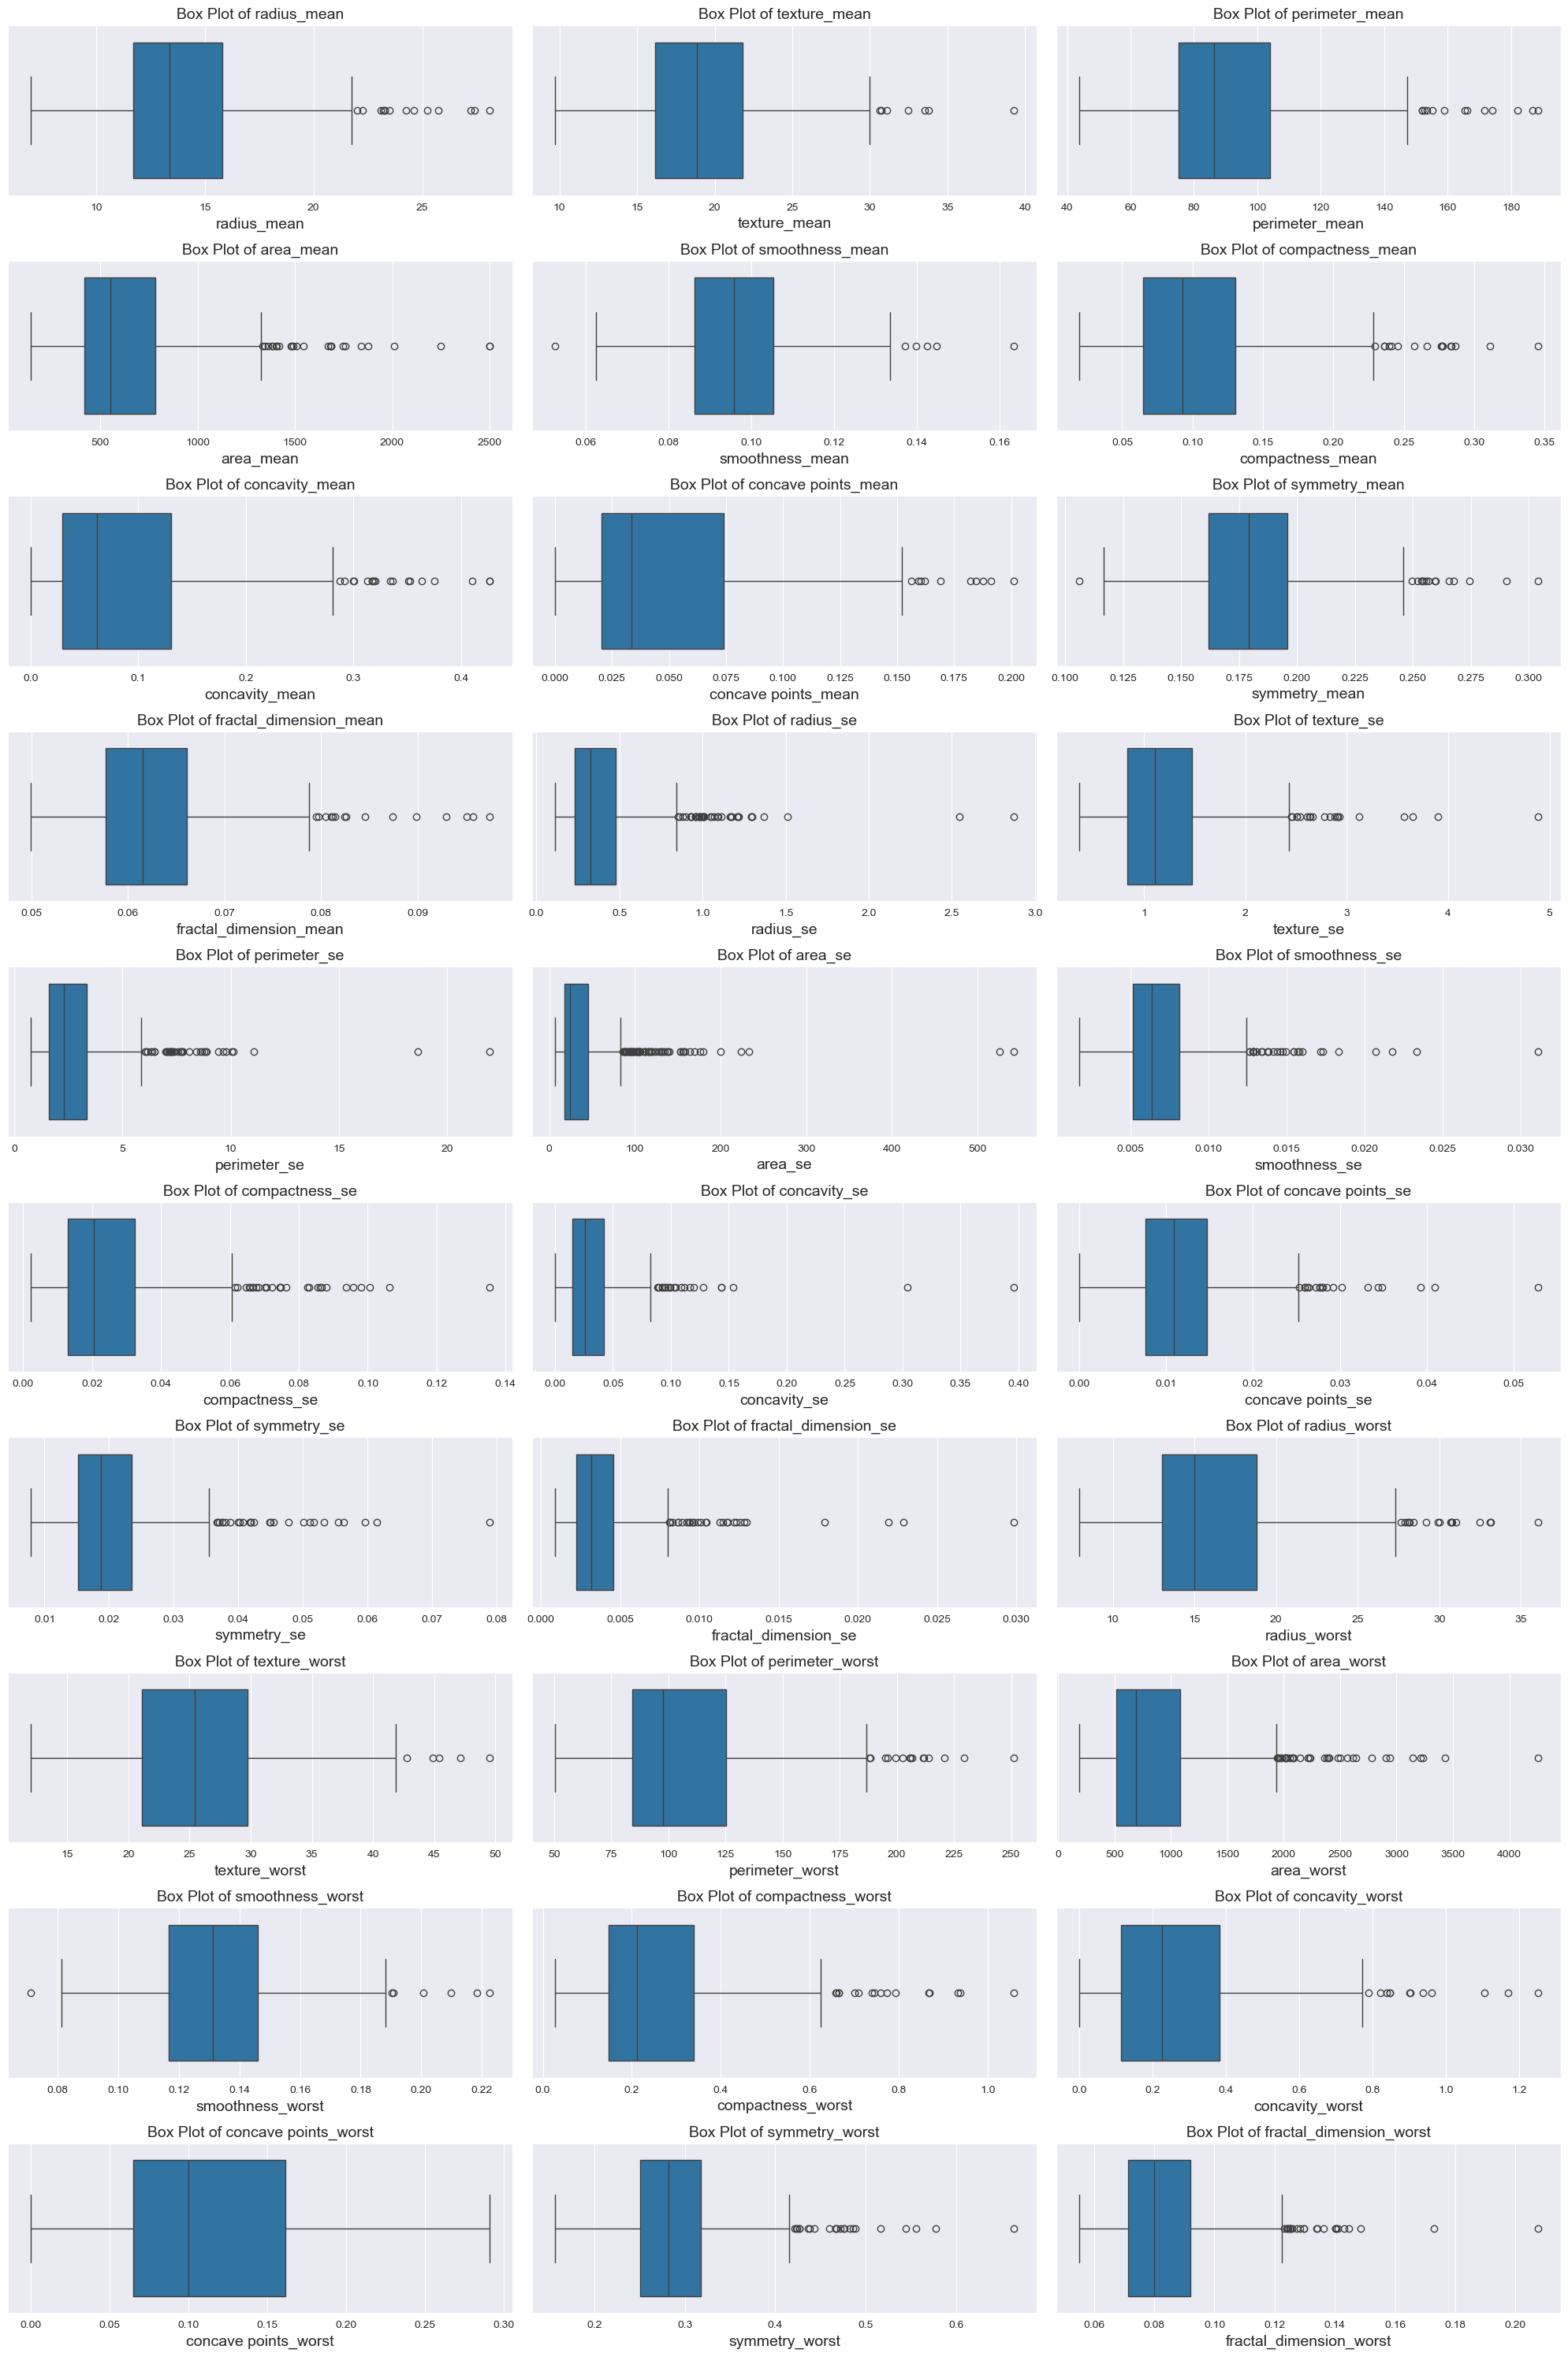

In [12]:
# Find the numerical features
num_cols = [col for col in df.columns if col not in ["id", "diagnosis", "Unnamed: 32"]]

# Box Plot analysis
fig, axes = plt.subplots(nrows= 10, ncols= 3, figsize= (20, 30))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(f"Box Plot of {col}", fontsize= 14)
    axes[i].set_xlabel(f"{col}", fontsize= 14)
plt.tight_layout()
plt.show()
    

### Key Findings

- Except **concave points_worst** feature all other numerical features have many outlier values above upper extreme. The **concave points_worst** foeature doesn't have any outlier. This might affect to find the pattern in the data for a ML model.

### Target Analysis(Understanding the Diagnosis Rate)
Analyze the distribution of target variable(**diagnosis**)

DIAGNOSIS RATE
diagnosis
B    357
M    212
Name: count, dtype: int64


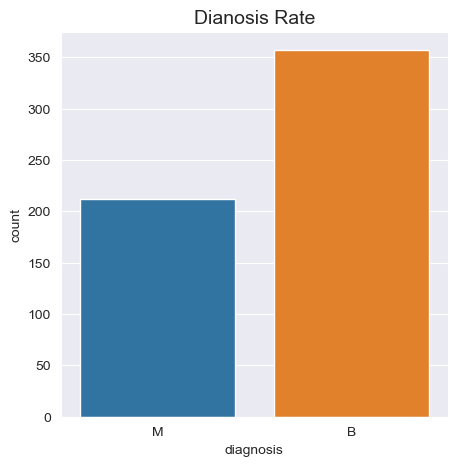

In [13]:
# Find the Dignosis Rate
diagnosis_rate = df["diagnosis"].value_counts()
print("=" * 60)
print("DIAGNOSIS RATE")
print("=" * 60)
print(diagnosis_rate)

# Visualize the Diagnosis rate
plt.figure(figsize=(5, 5))
sns.countplot(data= df, x= "diagnosis", hue= "diagnosis")
plt.title("Dianosis Rate", fontsize= 14)
plt.show()

### Key Findings

- From target analysis it is found that only **37%** tumors diagnised as **malignant**. So this dataset is imbalanced.

### Radious Analysis(Effect of Radious on Diagnosis)
Analyze how variations in features related to radious affects the diagnosis

Text(0.5, 1.0, 'Radious Analisis for Diagnosis')

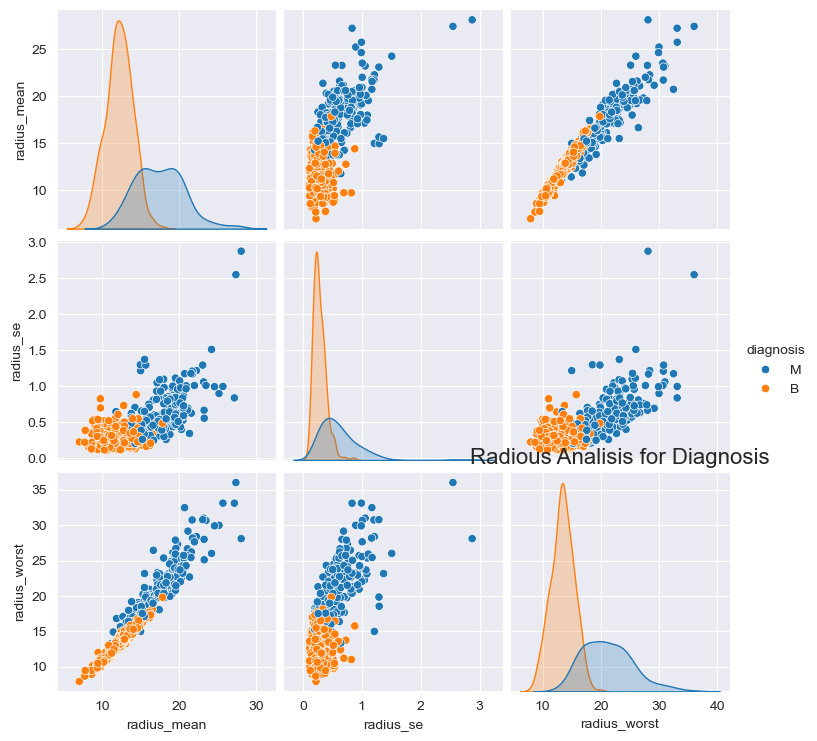

In [15]:
sns.pairplot(data=df, hue= "diagnosis", vars= ["radius_mean", "radius_se", "radius_worst"])
plt.title("Radious Analisis for Diagnosis", fontsize= 16)

### Key Findings

- Malignant tumors have significantly high radious, perimeter and area.

### Texture Analysis(Effect of texture of Tumor on Diagnosis)
Analyze how variations in features related to texture affects the diagnosis

Text(0.5, 1.0, 'Texture Analysis for Diagnosis')

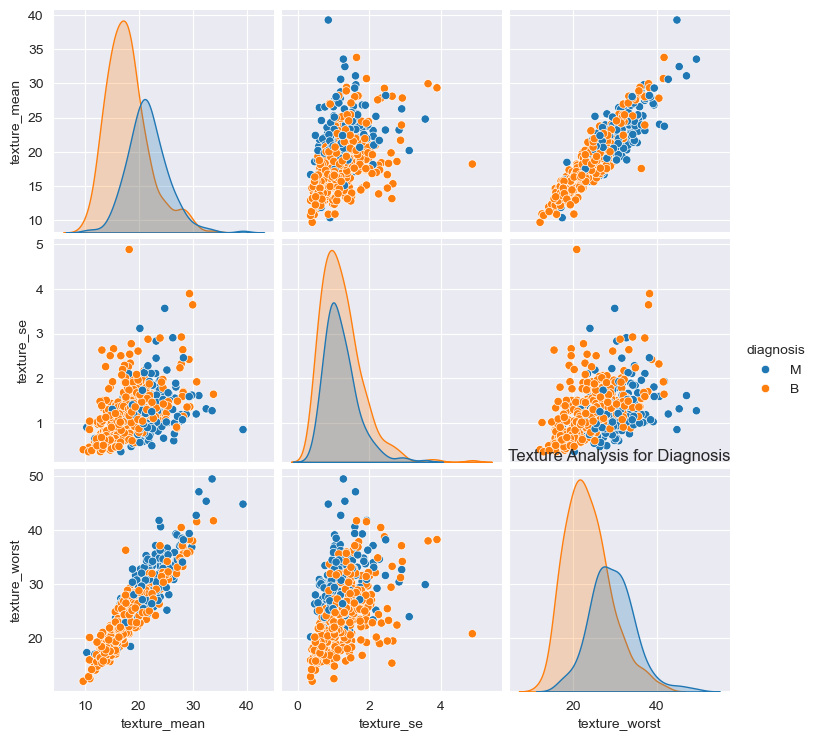

In [19]:
sns.pairplot(data= df, hue="diagnosis", vars=["texture_mean", "texture_se", "texture_worst"])
plt.title("Texture Analysis for Diagnosis")

### Key Findings

- We can't decide the type of tumor only depending on the texture of tumor.

### Smoothness Analysis(Effect of smoothness of Tumor on Diagnosis)
Analyze how variations in features related to smoothness affects the diagnosis

Text(0.5, 1.0, 'Dianosis Based on Smoothness')

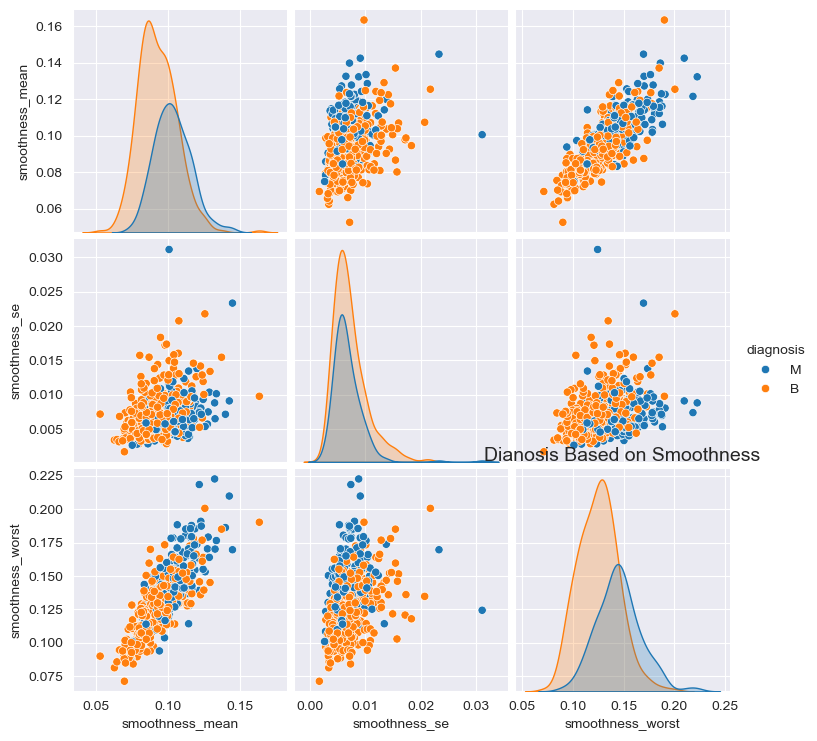

In [20]:
sns.pairplot(data= df, hue= "diagnosis", vars= ["smoothness_mean", "smoothness_se", "smoothness_worst"])
plt.title("Dianosis Based on Smoothness", fontsize= 14)

### Key Findings

- We can't decide the type of tumor only depending on the smoothness of tumor.

### Compactness Analysis(Effect of Compactness of Tumor on Diagnosis)
Analyze how variations in features related to compactness affects the diagnosis

Text(0.5, 1.0, 'Compactness Analysis for Diagnosis')

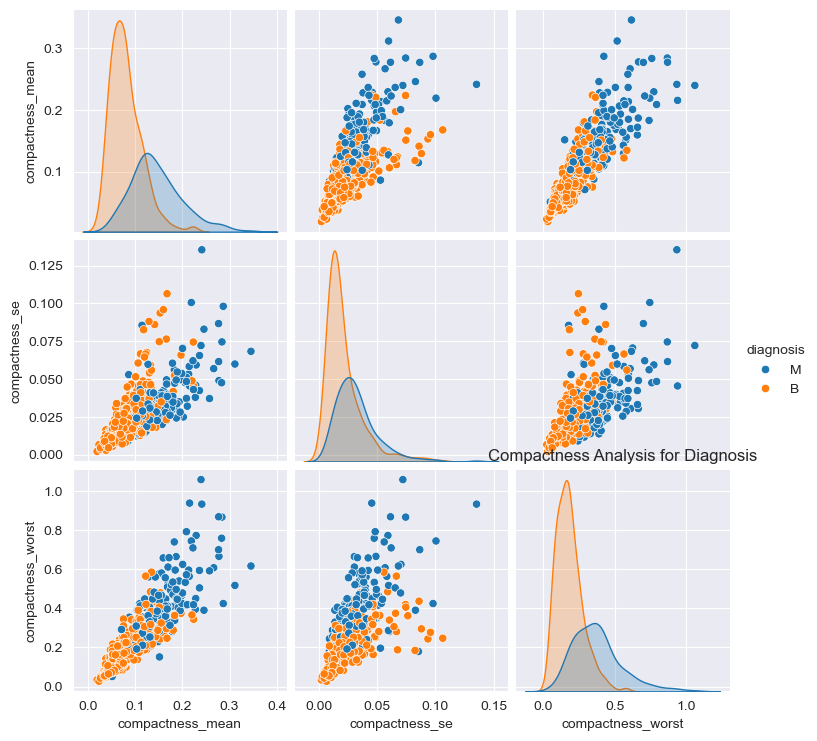

In [21]:
sns.pairplot(data= df, hue="diagnosis", vars= ['compactness_mean', 'compactness_se', 'compactness_worst'])
plt.title("Compactness Analysis for Diagnosis")

### Key Findings

- Malignant tumors have slightly high compactness.

### Concavity Analysis (Effect of Concavity of Tumor on Dianosis)

Analyze how severity of concave portions of the contour affect the diagnosis of tumor

Text(0.5, 1.0, 'Concavity Analysis for Diagnosis')

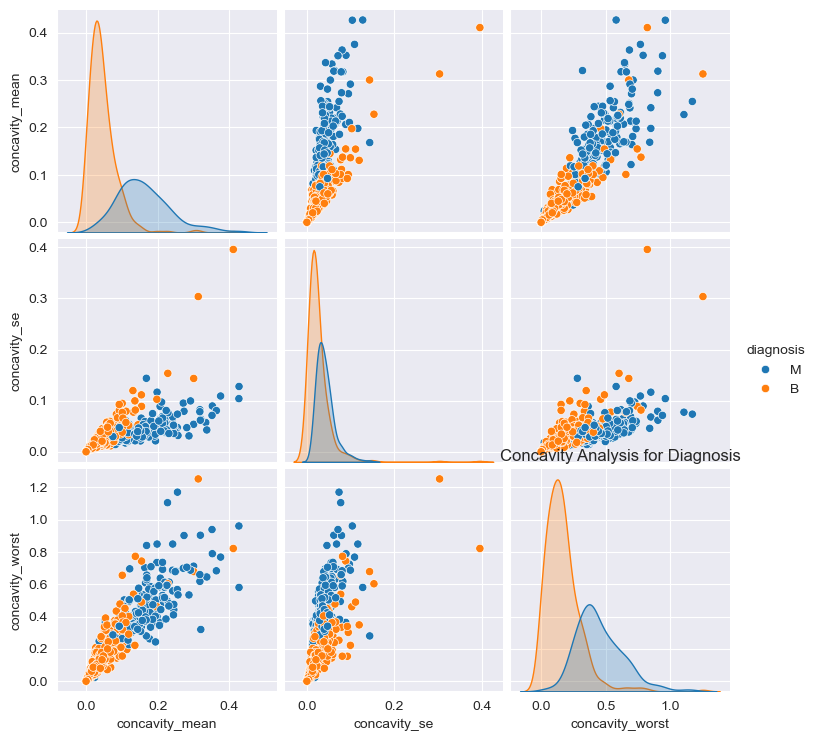

In [22]:
sns.pairplot(data= df, hue= "diagnosis", vars = ["concavity_mean", "concavity_se", "concavity_worst"])
plt.title("Concavity Analysis for Diagnosis")

### Key Findings

- Malignant tumors have significantly high concavity mean, though there are few outliers present.

### Concave Points Analysis (Effect of Concave Points of Tumor on Dianosis)

Analyze how number of concave portions of the contour affect the diagnosis of tumor

Text(0.5, 1.0, 'Concave Points Analysis for Diagnosis')

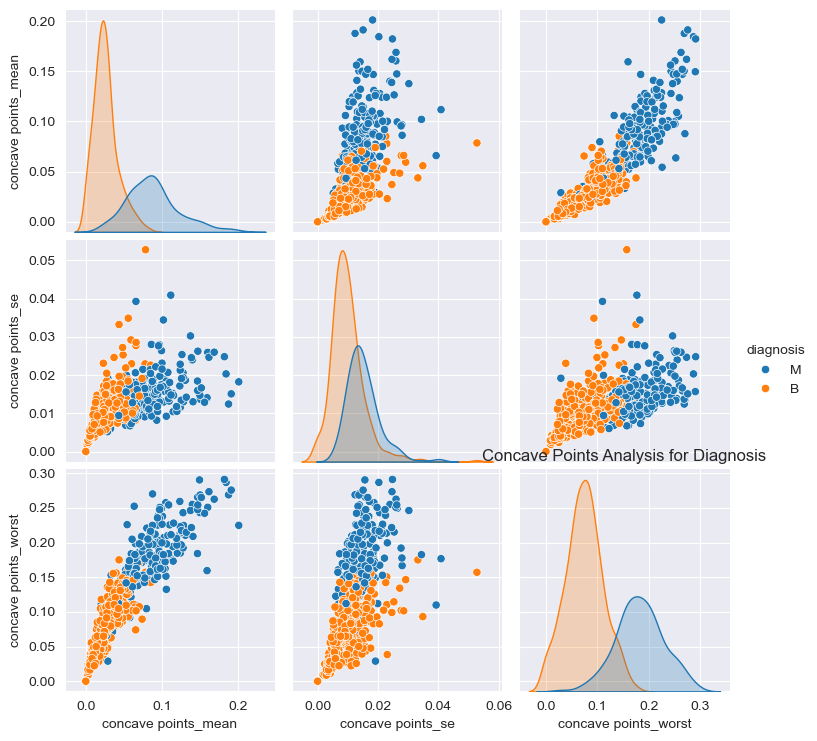

In [23]:
sns.pairplot(data= df, hue="diagnosis", vars= ["concave points_mean", "concave points_se", "concave points_worst"])
plt.title("Concave Points Analysis for Diagnosis")

### Key Findings

- Malignant tumors have significantly high concave portions present in contour.

### Symmetry Analysis (Effect of Symmetry of Tumor on Dianosis)

Analyze how symmetry affect the diagnosis of tumor

Text(0.5, 1.0, 'Symmetry Analysis for Diagnosis')

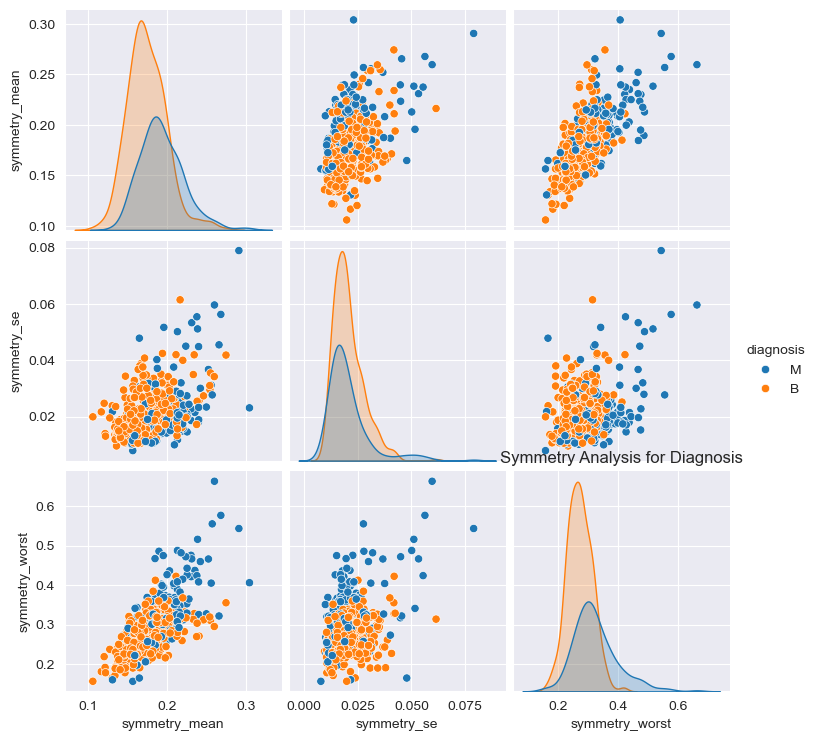

In [24]:
sns.pairplot(data= df, hue= "diagnosis", vars= ["symmetry_mean", "symmetry_se", "symmetry_worst"])
plt.title("Symmetry Analysis for Diagnosis")

### Key Findings

- We can't decide the type of tumor only depending on the symmetry of tumor.

### Fractal Dimension Analysis (Effect of Fractal Dimension of Tumor on Dianosis)

Analyze how fractal dimension affect the diagnosis of tumor.

Text(0.5, 1.0, 'Fractal Dimension Analysis for Diagnosis')

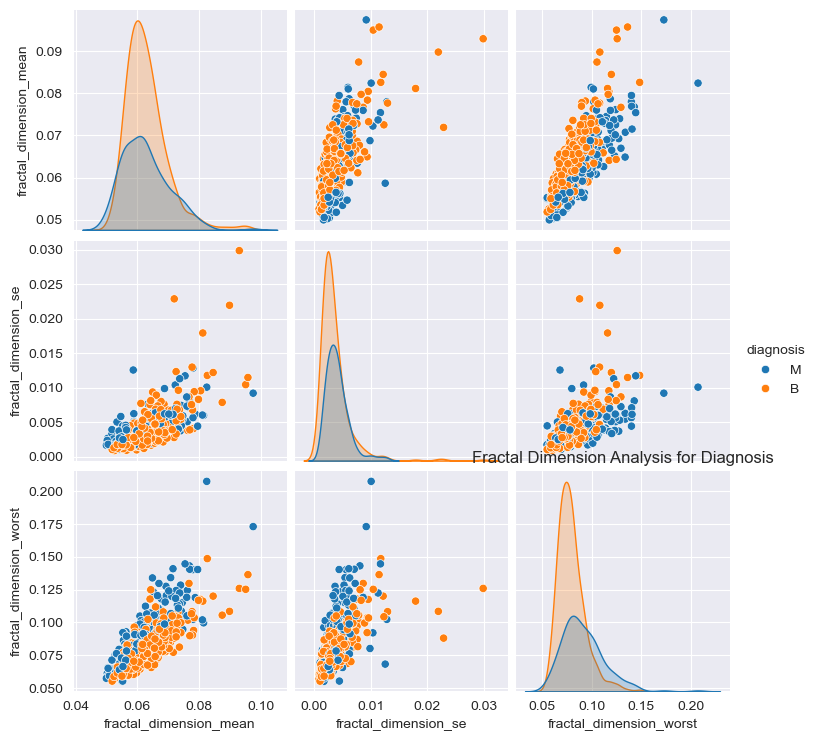

In [25]:
sns.pairplot(data= df, hue= "diagnosis", vars = ["fractal_dimension_mean", "fractal_dimension_se", "fractal_dimension_worst"])
plt.title("Fractal Dimension Analysis for Diagnosis")

### Key Findings

- We can't decide the type of tumor only depending on the fractal dimension of tumor.

### Data Cleaning

In [34]:
# Remove Unnecessary Features

# Remove id feature as it contains unique values for all observations which is not useful for finding patterns.
# Remove Unnamed: 32 feature as it contains null values for all observations

df.drop(["id", "Unnamed: 32"], axis= 1, inplace= True)

# Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Feature Encoding

In [36]:
# Encode the only one categorical feature that is the target variable diagnosis

# Define encoder
le = LabelEncoder()

# Encode
df["diagnosis"] = le.fit_transform(df["diagnosis"])

# Sanity Check
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### Feature Importance
Analyze the important features from the correlation with diagnosis.

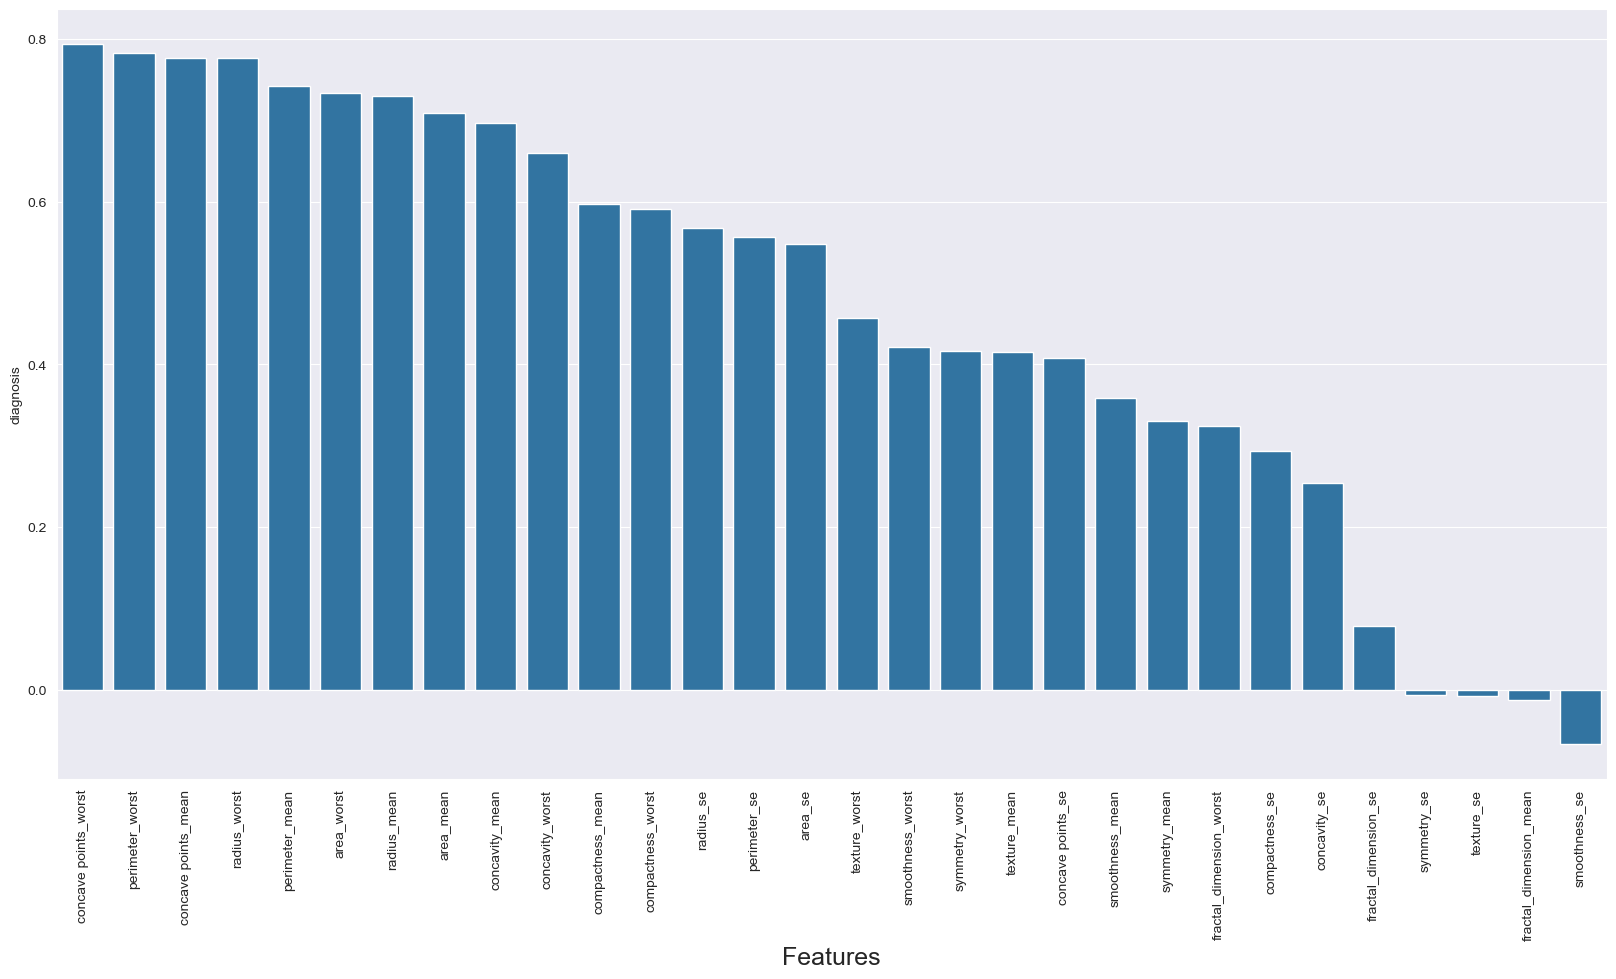

In [47]:
# Find correlationof all features with target variable(diagnosis)
diagnosis_corr = df.corr()["diagnosis"].sort_values(ascending= False)

# Drop the diagnosis
diagnosis_corr.drop("diagnosis", inplace= True)

# Visualize with Barplot
plt.figure(figsize= (20, 10))
sns.barplot(data= diagnosis_corr)
plt.xlabel("Features", fontsize= 18)
plt.xticks(rotation= 90)
plt.show()

### Key Findings

- Most of the features have modarate and high positive correlation with the target variable(diagnosis)

### Save the Cleaned Data

In [48]:
cleaned_path = os.path.join(data_path, "data_cleaned.csv")
df.to_csv(cleaned_path, index=False)